In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# train_df.fillna(train_df.median())
round(((train_df.isnull().sum()/len(train_df))*100), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [7]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [8]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [9]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [10]:
# men = train_df[train_df['Sex']=='male']
# women = train_df[train_df['Sex']=='female']

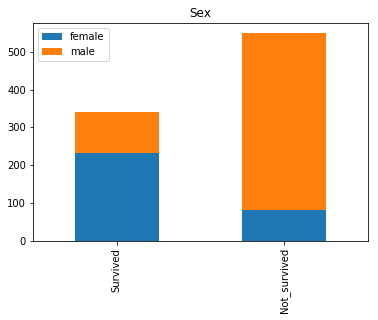

In [11]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()   #all with 1
    not_survived = train_df[train_df['Survived']==0][feature].value_counts()  #all with 0
    
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',stacked=True,fig=(18,6),title=feature)
bar_chart('Sex')    

In [12]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

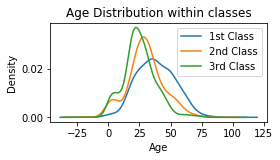

In [13]:
plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

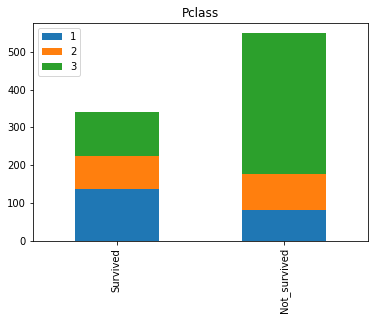

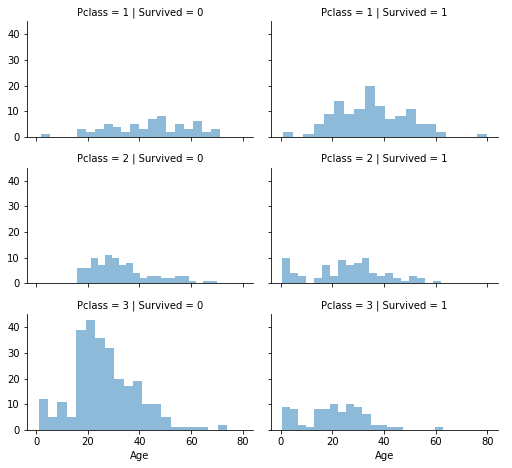

In [14]:
bar_chart('Pclass')

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

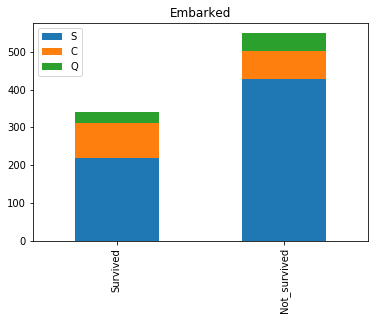

In [15]:
bar_chart('Embarked')

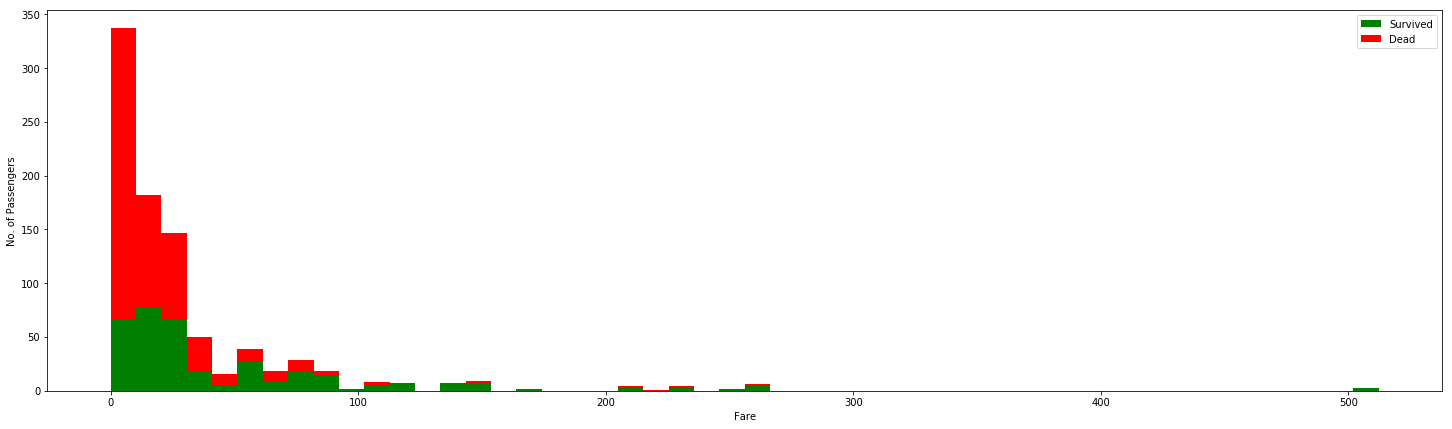

In [16]:
# Impact of Fare ticket of each passenger on the survival
figure = plt.figure(figsize=(25,7))
plt.hist([train_df[train_df['Survived'] ==1]['Fare'], train_df[train_df['Survived'] ==0]['Fare']], 
         stacked=True, color=['g', 'r'], bins = 50, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('No. of Passengers')
plt.legend();


In [17]:
#passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_df = train_df.drop(['PassengerId'], axis = 1)

In [20]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# data = [train_df, test_df]
# for dataset in data:
#     dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
#     dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
#     dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
#     dataset['not_alone'] = dataset['not_alone'].astype(int)
# train_df['not_alone'].value_counts()    

In [22]:
#train_df = train_df.drop(['Cabin'], axis = 1)

In [23]:
import re
deck = { "A" : 1,
        "B" : 2,
        "C" : 3,
        "D" : 4,
        "E" : 5,
        "F" : 6,
        "G" : 7,
        "H" : 8,
}
data = [train_df, test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x : re.compile("([a-zA-z+])").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)                          

In [24]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [25]:
train_df['Deck'].unique()

array([0, 3, 5, 7, 4, 1, 2, 6], dtype=int64)

In [26]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size = is_null)
    
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [27]:
train_df["Age"].isnull().sum()

0

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int32
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


In [29]:
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
titles = {
    "Mr" : 1,
    "Mrs" : 2,
    "Miss" : 3,
    "Master" : 4,
    "Rare" : 5,
    
}

In [31]:
for dataset in data:
  #Extract Titles
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand = True)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
  dataset['Title'] = dataset['Title'].replace('Ms','Miss')

  #Convert title into Numbers
  dataset['Title'] = dataset['Title'].map(titles)
  dataset['Title'].fillna(0)

In [32]:
all(train_df.Title)

True

In [33]:
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [34]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,0,1.0
1,1,1,female,38,1,0,PC 17599,71,C,3,2.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,3.0
3,1,1,female,35,1,0,113803,53,S,3,2.0
4,0,3,male,35,0,0,373450,8,S,0,1.0


In [35]:
genders = {
    "male" : 0,
    "female" : 1
}

data = [train_df, test_df]
for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

In [36]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,0,1.0
1,1,1,1,38,1,0,PC 17599,71,C,3,2.0
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,3.0
3,1,1,1,35,1,0,113803,53,S,3,2.0
4,0,3,0,35,0,0,373450,8,S,0,1.0
5,0,3,0,35,0,0,330877,8,Q,0,1.0
6,0,1,0,54,0,0,17463,51,S,5,1.0
7,0,3,0,2,3,1,349909,21,S,0,4.0
8,1,3,1,27,0,2,347742,11,S,0,2.0
9,1,2,1,14,1,0,237736,30,C,0,2.0


In [37]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [38]:
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [39]:
ports = {
    'S' : 1,
    'C' : 2,
    'Q' : 3
}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,1,0,1.0
1,1,1,1,38,1,0,71,2,3,2.0
2,1,3,1,26,0,0,7,1,0,3.0
3,1,1,1,35,1,0,53,1,3,2.0
4,0,3,0,35,0,0,8,1,0,1.0


In [41]:
# Categorizing data
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 66), 'Age'] = 7

train_df['Age']

0      2
1      5
2      3
3      5
4      5
5      5
6      6
7      2
8      3
9      1
10     4
11     6
12     2
13     5
14     1
15     6
16     2
17     2
18     4
19     5
20     5
21     5
22     1
23     4
24     8
25     5
26     4
27     2
28     2
29     5
      ..
861    2
862    6
863    2
864    3
865    6
866    3
867    4
868    3
869    4
870    3
871    6
872    4
873    6
874    4
875    1
876    2
877    2
878    4
879    6
880    3
881    4
882    2
883    4
884    3
885    5
886    3
887    2
888    5
889    3
890    4
Name: Age, Length: 891, dtype: int32

In [42]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int32
SibSp         int64
Parch         int64
Fare          int32
Embarked      int64
Deck          int32
Title       float64
dtype: object

In [43]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,1,0,1.0
1,1,1,1,5,1,0,71,2,3,2.0
2,1,3,1,3,0,0,7,1,0,3.0
3,1,1,1,5,1,0,53,1,3,2.0
4,0,3,0,5,0,0,8,1,0,1.0
5,0,3,0,5,0,0,8,3,0,1.0
6,0,1,0,6,0,0,51,1,5,1.0
7,0,3,0,2,3,1,21,1,0,4.0
8,1,3,1,3,0,2,11,1,0,2.0
9,1,2,1,1,1,0,30,2,0,2.0


In [44]:
data = [train_df, test_df]

for dataset in data:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454) , 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31 ) , 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99) , 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250) , 'Fare'] = 4
  dataset.loc[(dataset['Fare'] > 250), 'Fare'] = 5
  dataset['Fare'] = dataset['Fare'].astype(int)

In [45]:
train_df['Fare'].unique()

array([0, 3, 1, 2, 5, 4], dtype=int64)

In [46]:
#Adding new features
#AGE CLASS
data = [test_df, train_df]
for dataset in data:
    dataset['Age_Class'] = dataset['Age']*dataset['Pclass']
train_df.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,1,0,1.0,6
1,1,1,1,5,1,0,3,2,3,2.0,5
2,1,3,1,3,0,0,0,1,0,3.0,9
3,1,1,1,5,1,0,3,1,3,2.0,5
4,0,3,0,5,0,0,1,1,0,1.0,15


In [47]:
data = [train_df, test_df]

for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone']  = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)

In [48]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [49]:
train_df['relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

In [50]:
#Fare per Person
data = [train_df, test_df]

for dataset in data:
  dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
  dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [51]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,relatives,not_alone,Fare_Per_Person
0,0,3,0,2,1,0,0,1,0,1.0,6,1,0,0
1,1,1,1,5,1,0,3,2,3,2.0,5,1,0,1
2,1,3,1,3,0,0,0,1,0,3.0,9,0,1,0
3,1,1,1,5,1,0,3,1,3,2.0,5,1,0,1
4,0,3,0,5,0,0,1,1,0,1.0,15,0,1,1
5,0,3,0,5,0,0,1,3,0,1.0,15,0,1,1
6,0,1,0,6,0,0,3,1,5,1.0,6,0,1,3
7,0,3,0,2,3,1,2,1,0,4.0,6,4,0,0
8,1,3,1,3,0,2,1,1,0,2.0,9,2,0,0
9,1,2,1,1,1,0,2,2,0,2.0,2,1,0,1


In [52]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [53]:
X_train.isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Deck               0
Title              1
Age_Class          0
relatives          0
not_alone          0
Fare_Per_Person    0
dtype: int64

In [54]:
def all(df):
    with pd.option_context("display.max_rows",1000,"display.max_columns",1000):
        display(df)
    

In [55]:
X_train.Title.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [56]:
X_train = X_train.drop(369)

In [57]:
X_test = X_test.drop(369)

In [58]:
y_train = y_train.drop(369)

In [59]:
X_test.dtypes

Pclass             int64
Sex                int64
Age                int32
SibSp              int64
Parch              int64
Fare               int32
Embarked           int64
Deck               int32
Title              int64
Age_Class          int64
relatives          int64
not_alone          int32
Fare_Per_Person    int32
dtype: object

In [60]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
%time sgd.fit(X_train, y_train)


Wall time: 16 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

78.43

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [64]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
%time rf.fit(X_train, y_train)

Wall time: 344 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
Y_pred_rf = rf.predict(X_test)
sc2 = rf.score(X_train, y_train)
accuracy_rf = round(sc2*100 ,2)
print(accuracy_rf)

92.81


In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
%time lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Wall time: 8 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
sc3 = lr.score(X_train, y_train)
accuracy_logisticreg = round(sc3*100, 2)
accuracy_logisticreg

80.9

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
%time knn.fit(X_train, y_train)

Wall time: 8 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [73]:
y_pred = knn.predict(X_test)

In [74]:
sc4 = knn.score(X_train, y_train)
accuracy_knn = round(sc4*100, 2)
accuracy_knn

85.51

In [80]:
from sklearn.naive_bayes import GaussianNB

g = GaussianNB()
%time g.fit(X_train, y_train)
Y_pred_g = g.predict(X_test)

sc5 = g.score(X_train, y_train)

Wall time: 0 ns


In [81]:
accuracy_g = round(sc5*100,2)
accuracy_g

78.31

In [82]:
from sklearn.linear_model import Perceptron

In [84]:
per =  Perceptron(max_iter = 5)
%time per.fit(X_train, y_train)
y_test = per.predict(X_test)
sc6 = per.score(X_train, y_train)
accuracy_per = round(sc6*100,2)
accuracy_per

Wall time: 8 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


71.35

In [85]:
#SVM
from sklearn.svm import LinearSVC
svm = LinearSVC()
%time svm.fit(X_train, y_train)

Wall time: 96 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [86]:
y_pred_svm = svm.predict(X_test)

In [87]:
sc7 = svm.score(X_train,y_train)
accuracy_svm = round(sc7*100,2)
accuracy_svm

80.9

In [88]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred =  dt.predict(X_test)

In [94]:
sc8 = dt.score(X_train,y_train)
accuracy_dt = round(sc8*100, 2)
accuracy_dt

92.81